In [1]:
import numpy as np 


class svm:

    def __init__(self, learning_rate=0.003, lambda_param=0.01, n_iters=1200):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Basic check to convert 0, 1 to -1, 1
        y_ = np.where(y <=0, -1, 1)

        # initalize the weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descenting for finding minimum error and maximum accuracy
        for _ in range(self.n_iters):
          # On every iteration go to each record and perform the below
          for idx, x_i in enumerate(X):
            condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1

            if condition:
                self.w -= self.lr * (2 * self.lambda_param * self.w)
            else:
                
                self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                self.b -= self.lr * y_[idx]


    def predict(self, X):
        # w * x - b
        linear_model = np.dot(X, self.w) - self.b
        return np.sign(linear_model)
    
    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy  

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y==0, -1, 1)

In [4]:
y


array([ 1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [5]:
clf = svm()
clf.fit(X, y)
predictions = clf.predict(X)

In [6]:
print("Weights: ", clf.w, "Bias: ", clf.b)

Weights:  [0.4544954  0.18588077] Bias:  -0.2880000000000002


In [7]:
def visualize():

    def get_hyperplane_value(x, w, b, offset):
        
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o', c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)


    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)


    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)


    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')


    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])

    ax.set_ylim([x1_min-3, x1_max+3])

    plt.show()





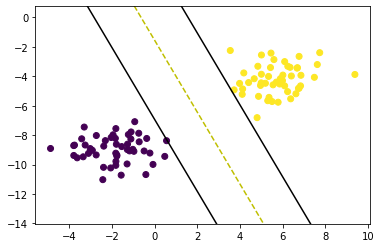

In [8]:
%matplotlib inline
visualize()